In [1]:
# for data analysis
import pandas as pd 
import numpy as np
import random as rnd
import sys

# for data viz
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# for machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_data = pd.read_csv('processed_cleveland_data_train.csv')
test_data = pd.read_csv('processed_cleveland_data_test.csv')

# Parameter of interest is num, for now this is a binary problem
def make_prediction_var_binary(df):
    df['num'] = df['num'].replace([1, 2, 3, 4, 5, 6], 1)

        
make_prediction_var_binary(train_data)
make_prediction_var_binary(test_data)

train_data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
132,51,1,4,140,261,0,2,186,1,0.0,1,0,3,0
122,55,1,4,140,217,0,0,111,1,5.6,3,0,7,1
83,68,1,3,180,274,1,2,150,1,1.6,2,0,7,1
65,60,1,4,145,282,0,2,142,1,2.8,2,2,7,1
127,44,1,2,120,220,0,0,170,0,0.0,1,0,3,0


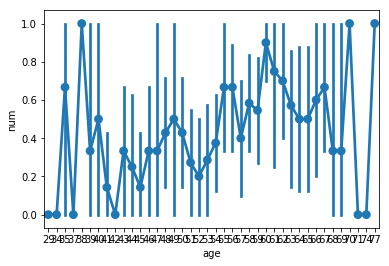

In [3]:
sns.pointplot(x='age', y='num', data=train_data)

In [4]:
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [11]:
from sklearn.model_selection import train_test_split

X_train = train_data.drop(['num'], axis=1)
y_train = train_data['num']

X_test = test_data.drop(['num'], axis=1)
y_test = test_data['num']

y_train.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose classifer 

clf = RandomForestClassifier()

# Choose Parameters and stuff
parameters = {'n_estimators': [4,6,9],
             'max_features': ['log2', 'sqrt', 'auto'],
             'criterion': ['entropy', 'gini'],
             'max_depth': [2, 3, 5, 10],
             'min_samples_split': [2, 3, 5],
             'min_samples_leaf': [1, 5, 8]}

# Type of scoring to compare parameter combos 
acc_scorer = make_scorer(accuracy_score)

# Run grid search 
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Pick the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.786885245902


In [28]:
# Cross Validation with KFold
from sklearn.cross_validation import KFold

all_data = pd.read_csv('processed_cleveland_data.csv')
make_prediction_var_binary(all_data)

X_all = all_data.drop(['num'], axis=1)
y_all = all_data['num']


y_all.head()

def run_kfold(clf):
    kf = KFold(297, n_folds=5)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        mean_outcome = np.mean(outcomes)
        print("Mean Accuracy: {0}".format(mean_outcome)) 

run_kfold(clf)
    

Fold 1 accuracy: 0.8666666666666667
Mean Accuracy: 0.8666666666666667
Fold 2 accuracy: 0.9166666666666666
Mean Accuracy: 0.8916666666666666
Fold 3 accuracy: 0.7966101694915254
Mean Accuracy: 0.8599811676082862
Fold 4 accuracy: 0.8135593220338984
Mean Accuracy: 0.8483757062146893
Fold 5 accuracy: 0.7966101694915254
Mean Accuracy: 0.8380225988700565
